In [2]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import islice
%matplotlib inline

# Perceptron

Invented by Frank Rosenblatt (1957) ...one of the first implementations of an **Artificial Neural Network** (ANN)

A perceptron is an algorithm for learning a **binary classifier**

- ...the task of classifying the elements of a set into one of two groups (each called class)
- Or ...a function which can decide whether or not an `input`
- ...(represented by a vector of numbers)...belongs to some specific class

Based on a linear predictor function aka a **threshold function**...

- ...combining a set of `weights` with the input vector
- Also called _step function_ or Linear Threshold Unit (LTU)
- ...in analogy to the biological neuron which fires upon reaching a input threshold
- ...if the threshold value is `0` then is is called a **heaviside-function** (after Oliver Heaviside)

## Threshold Function

Called a 

Function `decision` implements a step function with a threshold at `1`

- Step functions have a binary output either `0` or `1`
- ...they switch between a the outputs based on a threshold

In [24]:
def decision(sum):
    """Calculate a decision for sum
        Input: sum
        Output: 1, if sum >= 1,
                0 otherwise
    """
    if sum >= 1:
        return 1
    else:
        return 0

Given a couple of example `inputs`...

In [25]:
inputs = [-1, 0, 0.999, 1, 1.001, 2]
outputs = [decision(i) for i in inputs]
print(outputs)

[0, 0, 0, 1, 1, 1]


...use the step functions to calculate the outputs

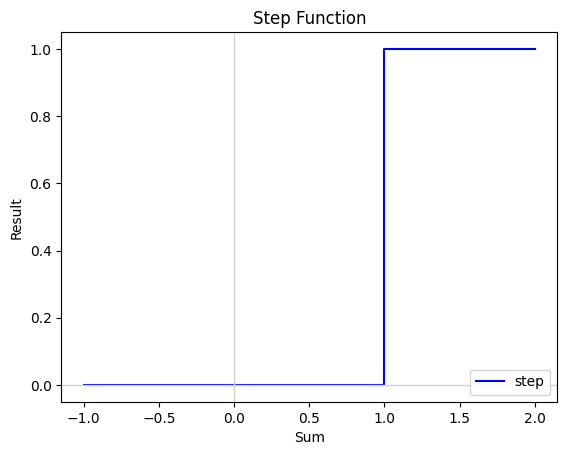

In [26]:
plt.step(inputs, outputs, '-b', label='step')
plt.axhline(0, color='lightgray', lw=1)
plt.axvline(0, color='lightgray', lw=1)
plt.xlabel('Sum')
plt.ylabel('Result')
plt.title('Step Function')
plt.legend(loc='lower right')
plt.show()

## Inputs

**Dimension** ...the number of inputs

Following a simple example of a scatter-plot:

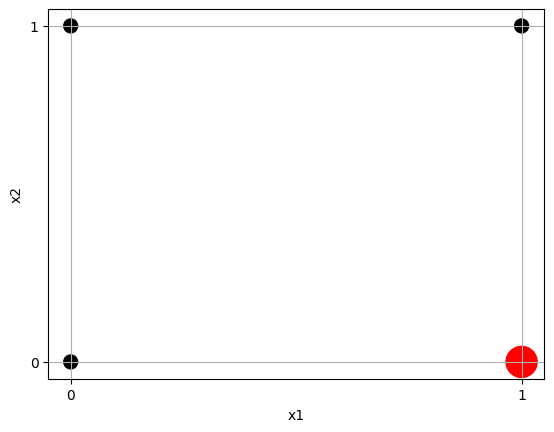

In [27]:
x1 = np.array([0, 0, 1, 1])
x2 = np.array([0, 1, 0, 1])

color = np.array(['black', 'black', 'red', 'black'])
size = np.array([100, 100, 500, 100])
plt.grid(True)
plt.scatter(x1, x2, c=color, s=size)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xticks([0.0, 1.0])
plt.yticks([0.0, 1.0])
plt.show()

Scatter plot example reading an input data set from a CSV file

['5.1,3.5,1.4,0.2,Iris-setosa\n', '4.9,3.0,1.4,0.2,Iris-setosa\n']


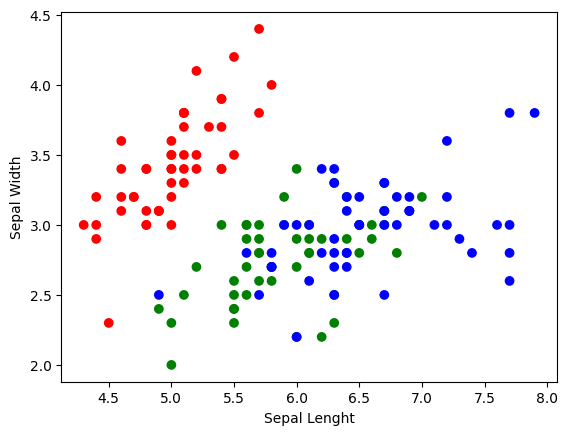

In [28]:
inputs = open('iris.csv', 'r')

# print the first two lines of the file as example
head = list(islice(inputs, 2))
print(head)

# translate flow names to colors
iris_color = {
    'Iris-setosa': 'red',
    'Iris-versicolor': 'green',
    'Iris-virginica': 'blue'
}

# iterate over the input data
x1 = []       # sepal length
x2 = []       # sepal width
colors = []   # sepal color
for line in inputs:
    words = line.rstrip().split(',')
    if len(words) != 5:
        continue
    x1.append(float(words[0]))
    x2.append(float(words[1]))
    colors.append(iris_color[words[4]])

inputs.close()

# create scatter plot
plt.scatter(np.array(x1), np.array(x2), color=colors)
plt.xlabel('Sepal Lenght')
plt.ylabel('Sepal Width')
plt.show()

## Weights & Scalar Products

ANN learns by adjusting weights...

- ...which determines the strength of signal propagation between artificial neurons
- Weights between 0 and 1 scale the signal down ...weights >1 amplify the signal
- Simplest form of a neuronal network uses **multiplication of an `input` value with a `weight`**
- In other words ..."The weight calibrates how sensitive a neutral network reacts to an input"

Process multiple inputs simultaneously to combine them into a **single prediction value**

- ...each input weighted individually
- ...aka weighted sum or **scalar product** (or dot-product)

Example to calculate a scalar product with NumPy:

In [29]:
inputs = np.array([0, 1])
weights = np.array([0.5, 0.7])

print("weights * input =", weights * inputs)
print("scalar product =", weights.dot(inputs))

weights * input = [0.  0.7]
scalar product = 0.7


## Single Layer Perceptron

In [30]:
def heaviside(sum):
    # threshold zero
    if sum >= 0:
        return 1
    else:
        return 0


def perceptron(inputs, expected_result):
    # accumulated wrror for all inputs vectors
    total_error = 0
    weights = np.array([-1, 1, 1])
    for index, input in enumerate(inputs):
        # weighted sum of all inputs
        product = weights.dot(input)
        # step function
        result = heaviside(product)
        # calculate error for input vector
        error = np.abs(result - expected_result[index])
        total_error += error
        print(input[1], input[2], expected_result[index], error)
    return total_error

# 3 dimensions: bias, input 1, input 2 
inputs = np.array([
    [1, 0, 0],  # bias
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])
expected_result = np.array([0, 1, 1, 1])

total_error = perceptron(inputs, expected_result)
print("total error = %1d" % total_error)

0 0 0 0
0 1 1 0
1 0 1 0
1 1 1 0
total error = 0
